# In this notebook, we explore implementation of KNN Classification algorithm

In [2]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# load the dataset
data = pd.read_csv('dataset-for-classification.csv')
x = np.array(data)

In [4]:
data.sample(4)

,x1,x2,y
7,2.443863,2.333674,0
19,1.612673,1.697697,0
28,4.066517,4.302472,1
35,4.729091,4.128983,1


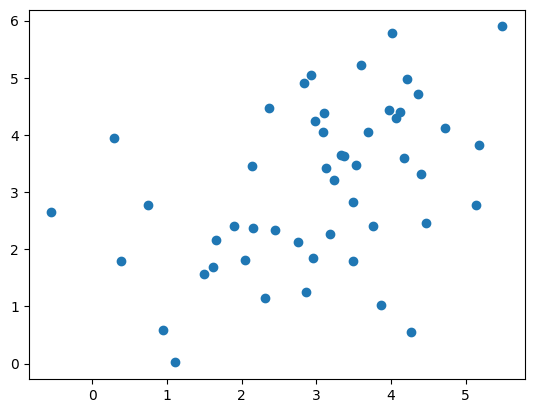

In [5]:
# plot for visualization of data
plt.scatter(data['x1'],data['x2'])

In [6]:
# separate based on class
x1 = np.array(data[data['y']==1])
x0 = np.array(data[data['y']==0])

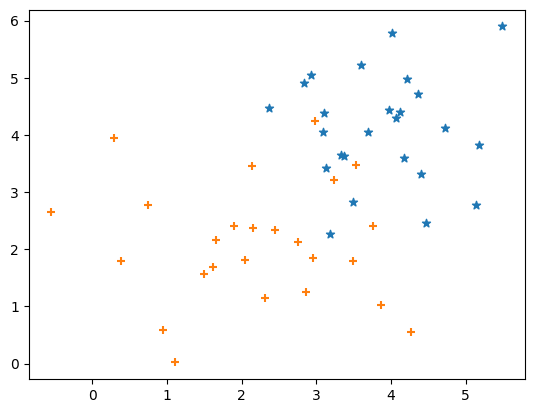

In [7]:
# plotting again
plt.scatter(x1[:,0],x1[:,1],marker='*')
plt.scatter(x0[:,0],x0[:,1],marker='+')

In [8]:
# now design the algorithm

# define required functions
def calcSqdDistances(datapoint):
    distances = ((datapoint[0] - x[:,0])**2 + (datapoint[1] - x[:,1])**2).round(3)
    return distances

def arrangePoints(datapoint):
    distances = calcSqdDistances(datapoint)
    dataFrame = data.copy()
    dataFrame['SqdDistances'] = distances
    dataFrame = dataFrame.sort_values(by='SqdDistances',ascending=True)
    dataFrame = dataFrame.reset_index(drop=True)
    return dataFrame

def KNNClassification(k, datapoint):
    KNearestPoints = arrangePoints(datapoint).head(k)
    count = KNearestPoints.groupby(['y']).count()
    prediction = count['x1'].idxmax()
    return prediction

Text(0, 0.5, '$X2$')

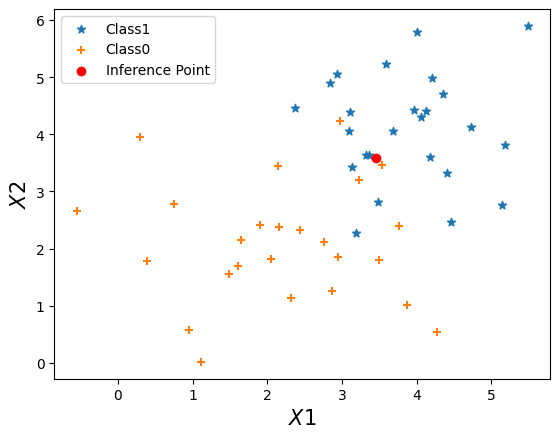

In [9]:
# plot with the datapoint for inference
datapoint = [3.456,3.587]

plt.scatter(x1[:,0],x1[:,1],marker='*',label='Class1')
plt.scatter(x0[:,0],x0[:,1],marker='+',label='Class0')
plt.scatter(datapoint[0],datapoint[1],color='r',label='Inference Point')
plt.legend()
plt.xlabel('$X1$',fontsize=15)
plt.ylabel('$X2$',fontsize=15)

In [10]:
prediction = KNNClassification(5,datapoint)
print('Predicted Class is ',prediction)

Predicted Class is  1
